In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Зареждане на данните
data_path = 'facebook_marketplace_data.csv'
data = pd.read_csv(data_path)
data

,Link,Photo Url,Price,Name,City
0,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,160 000 лв.,Апартамент,Botevgrad
1,https://www.facebook.com/marketplace/np/item/5...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,180 лв.,Lorelli бебешко легло 60/120см matrix new,"София, България"
2,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,125 000 лв.,Продавам къща в село Миланово област София.,Своге
3,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,139 500 лв.,Къща в с. Костенец,Kostenets
4,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,128 960 лв.,Двустаен апартамент в Надежда,"София, България"
...,...,...,...,...,...
207,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,150 лв.,Фритюрник 5 л. Bereket \nС чугунена горелка.,Kyustendil
208,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,106 000 лв.,Продава апаратамент в Малинова долина,"София, България"
209,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,95 лв.,Премиум ПВЦ мраморни панели,"София, България"
210,https://www.facebook.com/marketplace/np/item/2...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,205 000 лв.,Двустаен апартамент в кв.Кръстова вада,"София, България"


In [2]:
data.rename(columns={'Name': 'Title'}, inplace=True)

In [3]:
# добавяне на Вид на продукта спрямо title 
def classify_item(name):
    if 'апартамент' in name.lower():
        return 'Апартамент'
    elif 'къща' in name.lower():
        return 'Къща'
    elif 'легло' in name.lower():
        return 'Легло'
    else:
        return 'Други'

data['Item Type'] = data['Title'].apply(classify_item)

In [4]:
# проверка за липсващи стойности
missing_values = data.isnull().sum()
missing_values

Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64

In [5]:
print("Checking for NaN values:")
print(data.isna().sum())

print("Checking for infinite values:")
print((data == float('inf')).sum())

Checking for NaN values:
Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64
Checking for infinite values:
Link         0
Photo Url    0
Price        0
Title        0
City         0
Item Type    0
dtype: int64


In [6]:
data.dtypes

Link         object
Photo Url    object
Price        object
Title        object
City         object
Item Type    object
dtype: object

In [7]:
# Премахване на ненужни символи и преобразуване на цените в числов формат
def clean_price(price_str):
    # Премахваме всякакви символи като "лв.", запетаи и други нежелани знаци
    price_str = price_str.replace(' лв.', '').replace(' ', '').replace(',', '')
    try:
        return float(price_str)
    except ValueError:
        return np.nan  # В случай, че не може да бъде преобразувано в число, ще върнем NaN

In [8]:
data['City'] = data['City'].str.replace('България', '').str.strip()

In [9]:
# Премахване на редове с липсващи цени или градове
data = data.dropna(subset=['Price', 'City'])

In [10]:
# Настройки за визуализации
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Почистване на данните ---
# Премахване на излишни символи от цените и конвертиране към числов формат
data['Price'] = data['Price'].replace(r'[^\d]', '', regex=True)  # Премахване на символи
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')  # Превръщане в числов тип
data = data.dropna(subset=['Price'])  # Премахване на редове с липсващи цени

In [11]:
data

,Link,Photo Url,Price,Title,City,Item Type
0,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,160000,Апартамент,Botevgrad,Апартамент
1,https://www.facebook.com/marketplace/np/item/5...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,180,Lorelli бебешко легло 60/120см matrix new,"София,",Легло
2,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,125000,Продавам къща в село Миланово област София.,Своге,Къща
3,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,139500,Къща в с. Костенец,Kostenets,Къща
4,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,128960,Двустаен апартамент в Надежда,"София,",Апартамент
...,...,...,...,...,...,...
207,https://www.facebook.com/marketplace/np/item/8...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,150,Фритюрник 5 л. Bereket \nС чугунена горелка.,Kyustendil,Други
208,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,106000,Продава апаратамент в Малинова долина,"София,",Други
209,https://www.facebook.com/marketplace/np/item/1...,https://scontent.fsof4-1.fna.fbcdn.net/v/t45.5...,95,Премиум ПВЦ мраморни панели,"София,",Други
210,https://www.facebook.com/marketplace/np/item/2...,https://scontent.fsof4-1.fna.fbcdn.net/v/t39.3...,205000,Двустаен апартамент в кв.Кръстова вада,"София,",Апартамент


In [12]:
data.dtypes

Link         object
Photo Url    object
Price         int64
Title        object
City         object
Item Type    object
dtype: object

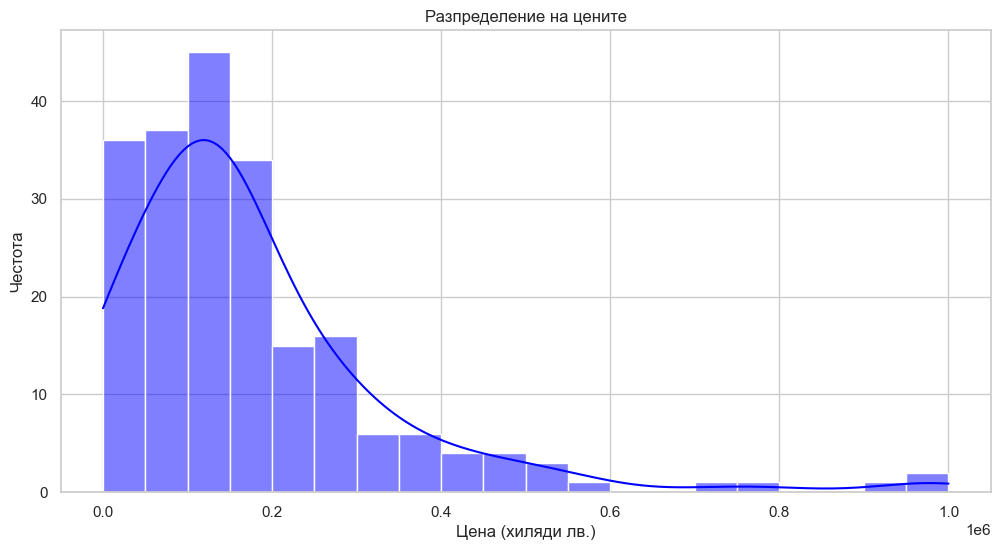

In [13]:
# --- Анализ на данните ---
# Разпределение на цените
plt.figure()
sns.histplot(data['Price'], bins=20, kde=True, color='blue')
plt.title('Разпределение на цените')
plt.xlabel('Цена (хиляди лв.)')
plt.ylabel('Честота')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_82368\2202756191.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


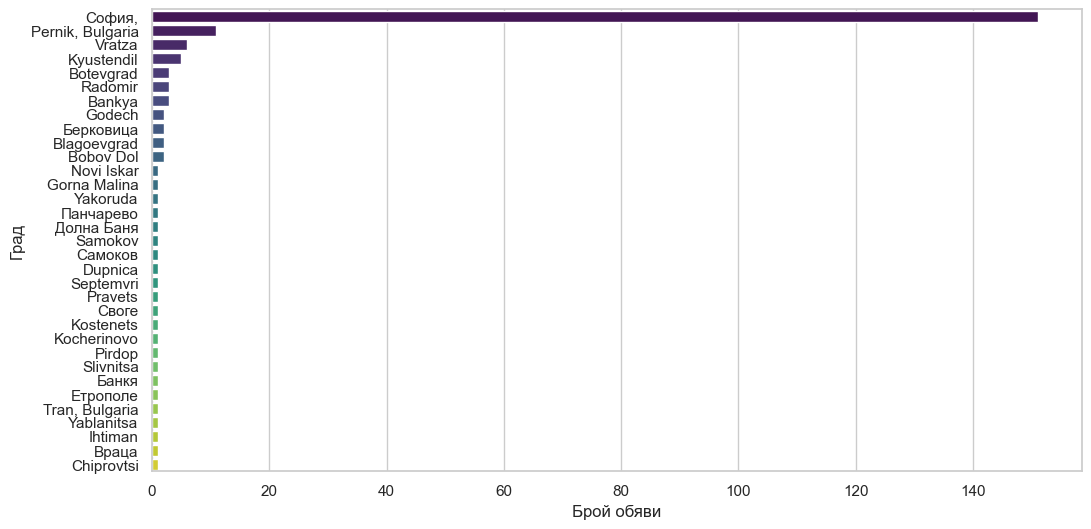

In [24]:
# Топ 10 града по брой обяви
top_cities = data['City'].value_counts()
plt.figure()
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.xlabel('Брой обяви')
plt.ylabel('Град')
plt.show()

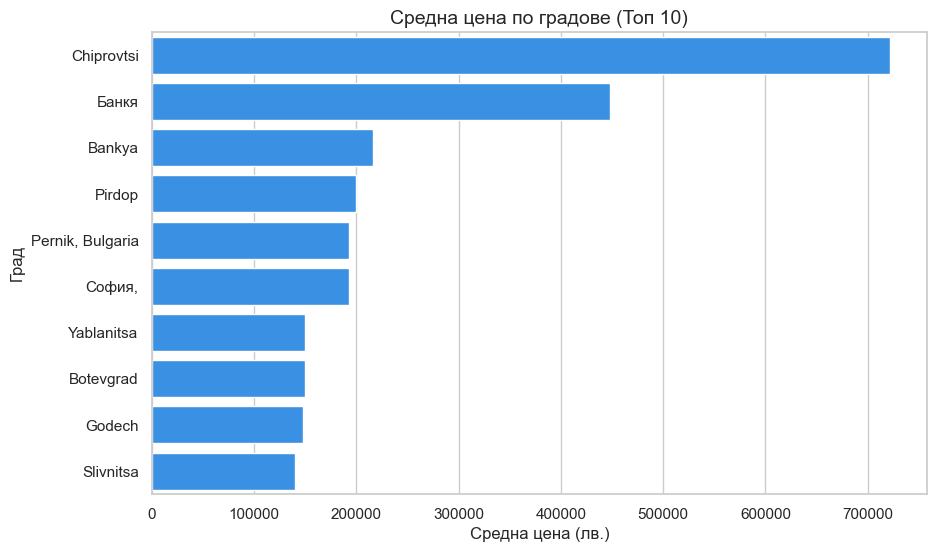

In [28]:
# Средни цени по градове (топ 10 града)
mean_prices_by_city = data.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)

# Без параметър palette за да избегнем предупреждението
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prices_by_city.values, y=mean_prices_by_city.index, color='dodgerblue')
plt.title('Средна цена по градове (Топ 10)', fontsize=14)
plt.xlabel('Средна цена (лв.)', fontsize=12)
plt.ylabel('Град', fontsize=12)
plt.show()

In [29]:
from collections import Counter
import re

# Премахване на водещи и следващи интервали от текстовите колони
data['Title'] = data['Title'].str.strip()

# Преобразуване на текста в малки букви и премахване на ненужни символи
data['Title'] = data['Title'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Разделяне на текста на думи и събиране на всички думи в един списък
all_words = ' '.join(data['Title'].tolist()).split()

# Изчисляване на честотата на думите
word_counts = Counter(all_words)

# Сортиране на думите по честота
common_words = word_counts.most_common()

# Показване на топ 10 най-често срещаните думи
print("Топ 10 най-често срещани думи в колоната 'Title':")
for word, count in common_words[:10]:
    print(f"{word}: {count}")


Топ 10 най-често срещани думи в колоната 'Title':
в: 93
апартамент: 69
къща: 40
тристаен: 38
с: 36
на: 33
двустаен: 27
продавам: 23
кв: 20
софия: 17


C:\Users\user\AppData\Local\Temp\ipykernel_82368\145109847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


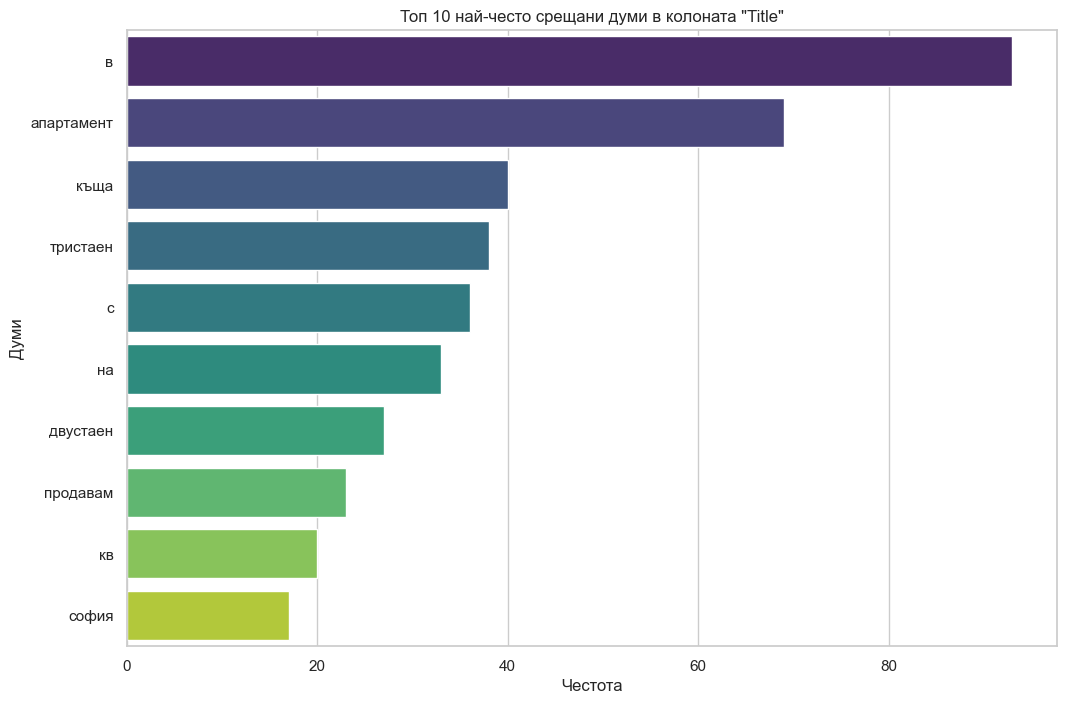

In [60]:
# Отделяне на думите и техните честоти в отделни списъци за графиката
words, counts = zip(*common_words)

# Създаване на бар графика
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel('Честота')
plt.ylabel('Думи')
plt.title('Топ 10 най-често срещани думи в колоната "Title"')
plt.show()


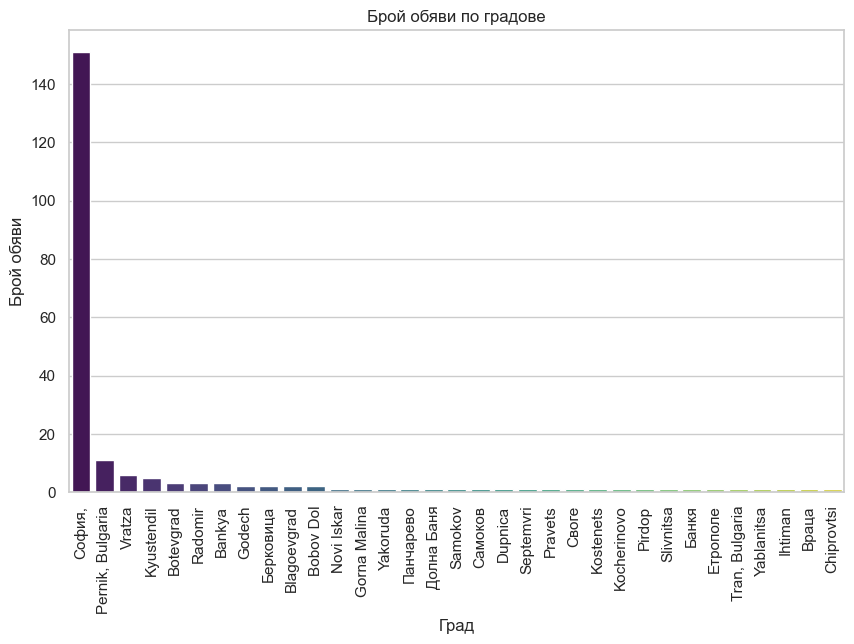

In [39]:
city_counts = data['City'].value_counts() 
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, dodge=False, palette='viridis', legend=False)
plt.title('Брой обяви по градове') 
plt.xlabel('Град')
plt.ylabel('Брой обяви')
plt.xticks(rotation=90)
plt.show()

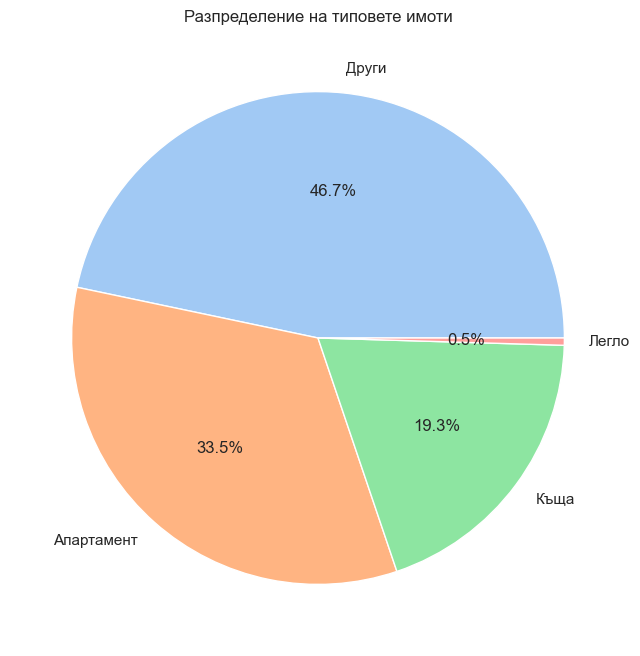

In [40]:

# Пай диаграма на типовете имоти
def classify_item(title):
    if 'апартамент' in title.lower():
        return 'Апартамент'
    elif 'къща' in title.lower():
        return 'Къща'
    elif 'легло' in title.lower():
        return 'Легло'
    else:
        return 'Други'

data['Item Type'] = data['Title'].apply(classify_item)
item_type_counts = data['Item Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(item_type_counts, labels=item_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Разпределение на типовете имоти')
plt.show()


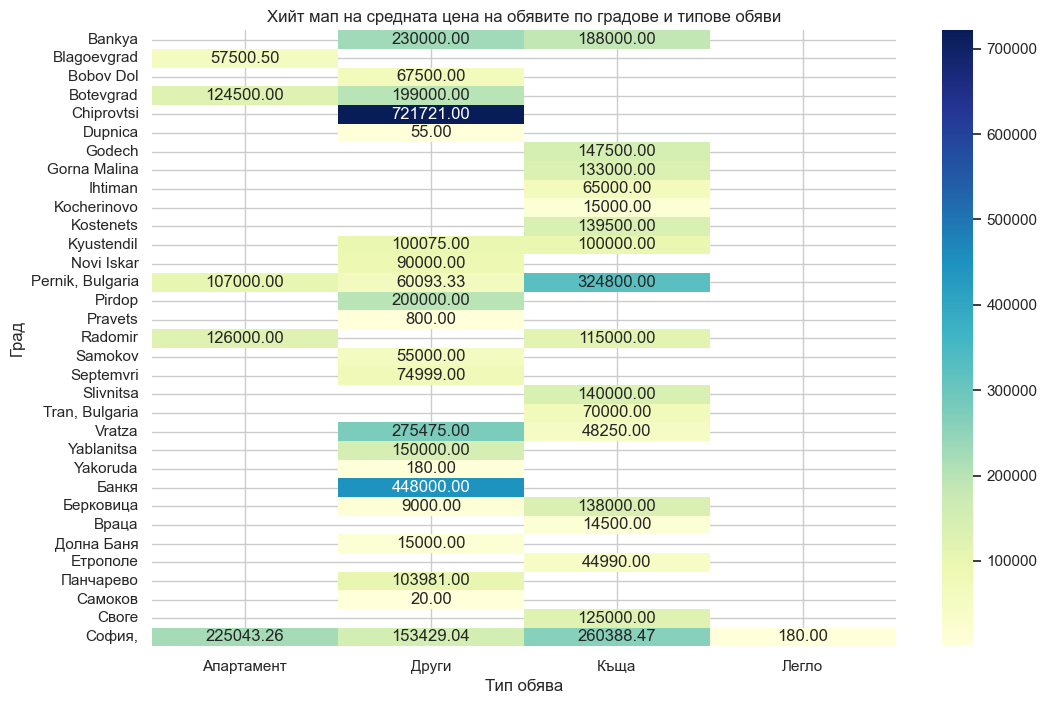

In [43]:
# Създаване на пивот таблица за средната цена на обявите по градове и типове имоти
pivot_table = data.pivot_table(values='Price', index='City', columns='Item Type', aggfunc='mean')

# Създаване на хийт мап
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Хийт мап на средната цена на обявите по градове и типове обяви')
plt.xlabel('Тип обява')
plt.ylabel('Град')
plt.show()
